<a href="https://colab.research.google.com/github/nladocsi/wrangling_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Number 1:
ab = pd.read_csv('airbnb_hw.csv', low_memory=False)

# First: remove commas from Price and coerce
var = 'Price'
ab[var] = ab[var].str.replace(',', '', regex=False)
ab[var] = pd.to_numeric(ab[var])
#print(ab[var].unique(), '\n')

# I made this choice because numeric variable should not include separators like commas. This risks Pandas droping these values
# Price is a numeric value therefore should

# Second: check for missing values (none!)
missing = ab[var].isnull().sum()
missing = int(missing)
print('Total Missings: \n', missing)

# Check for missing values

# Third: order from lowest to highest
ab_lowtohigh = ab.sort_values(by="Price")

FileNotFoundError: [Errno 2] No such file or directory: 'airbnb_hw.csv'

In [ ]:
# Number 2:

pf = pd.read_csv('mn_police_use_of_force.csv', low_memory=False)
var1 = 'subject_injury'

# First Check the number of missing values
missing = pf[var1].isnull().sum()
missing = int(missing)
print('Total Missings: \n', missing)

#Replace missing values
print(pf[var1].unique(), '\n')
pf[var1] = pf[var1].replace(' ',np.nan)
si_filled = pf[var1].fillna('unknown')
print(pf[var1].value_counts(), '\n')


missing_proportion = pf[var1].isna().mean()
print(f"Proportion missing in {var1}: {missing_proportion:.2f}")
# This is a concern! There is more than 50% missing.

pd.crosstab(si_filled, pf['force_type'])
# From the table made it appears as though bodily force (7051), chemical irritant (1421), taser (985) have the biggest increases in unknown data for subject injuries

Total Missings: 
 9848
[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

Proportion missing in subject_injury: 0.76


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
unknown,2,7051,1421,0,27,74,87,0,170,31,985


In [6]:
# Number 3 & 4:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
jd = pd.read_csv(url,low_memory=False)

var2 = 'WhetherDefendantWasReleasedPretrial'

print(jd[var2].unique(), '\n')
jd[var2] = jd[var2].replace([9], np.nan)
print(jd[var2].value_counts())
# 9 means there is insufficient/missing information

var3 = 'ImposedSentenceAllChargeInContactEvent'

jd[var3] = jd[var3].round(3)
#print(jd[var3].unique(), '\n')
#jd[var3] = jd[var2].replace([9], np.nan)
#print(jd[var3].value_counts())

#rint(jd[var2].unique(), '\n')



[9 0 1] 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

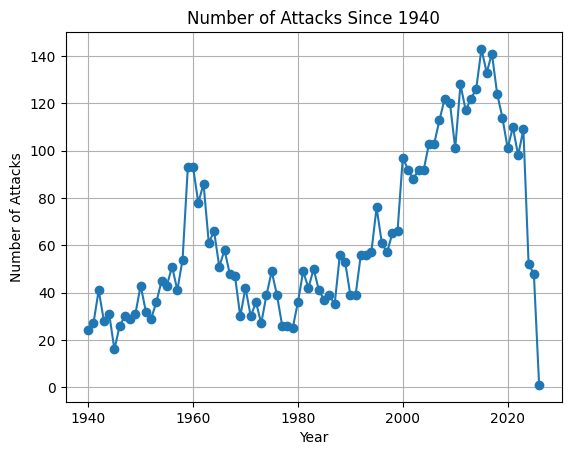

0.8026128940641863
['Provoked' 'Unprovoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat'] 

Type
Unprovoked             5196
Provoked                639
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             26
Boat                      7
 Provoked                 2
unprovoked                1
Unconfirmed               1
?                         1
Unverified                1
Under investigation       1
Name: count, dtype: int64 



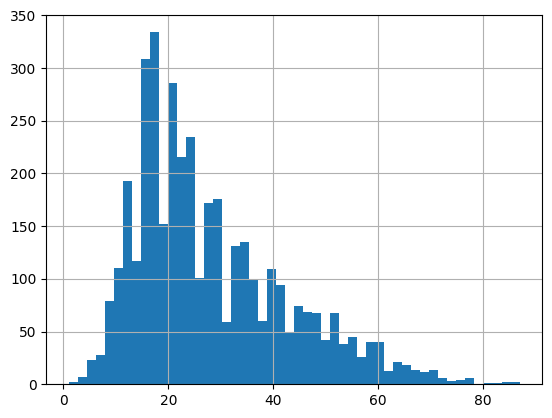

In [83]:
#1
df_shark = pd.read_excel('GSAF5.xls', engine='xlrd')

#2
#print(df_shark.columns)
df_shark = df_shark.drop(columns=['pdf', 'href formula', 'href', 'Case Number.1', 'original order', 'Unnamed: 22'])

#3
#print(df_shark['Year'].unique(), '\n')
df_shark['Year'] = df_shark['Year'].replace(['0000', 'nan'], np.nan)
#Range is from around 05 AD to 2025. In the above code I located 0000 as a missing value because these were not the actual year 0000.
df_filtered = df_shark[df_shark['Year'] >= 1940]
attack_counts = df_filtered.groupby('Year').size()
#print(attack_counts)

attack_counts.plot(kind='line', marker='o', title='Number of Attacks Since 1940')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()
#Attacks are showing an overall increase, but from 1960-1980 there appeared to be a slight decrease peaked in 2018 then a decrease in 2020-21 (COVID?)

#4
#print(df_shark["Age"].unique(), '\n')
df_shark['Age'] = pd.to_numeric(df_shark['Age'], errors='coerce')
#print(df_shark['Age'].describe(),'\n')
df_shark['Age'].hist(bins = 50)
df_shark['bond_NA'] = df_shark['Age'].isnull() # Create a bond missing dummy; long tail
#print(sum(df_shark['bond_NA']),'\n')

#5
df_shark['Sex'].unique()
df_shark['S_clean'] = df_shark['Sex'].astype(str).str.strip().str.upper()
df_shark['S_clean'] = df_shark['S_clean'].replace({'M':'MALE','MALE':'MALE','F':'FEMALE','FEMALE':'FEMALE'})
prop_male = (df_shark['S_clean'] == 'MALE').mean()
print(prop_male)

#6
print(df_shark["Type"].unique(), '\n')
print(df_shark['Type'].value_counts(), '\n')

df_shark['Type'] = pd.Categorical(df_shark['Type'], categories=['Unprovoked', 'Provoked', 'Unknown'])
#5196 --> unprovoked
#5196/6527 = 0.79

#df_shark['Type'] = pd.Categorical(df_shark['Type'], categories=['Unprovoked', 'Provoked'])
#first =  (df_shark['case_type'] == 'Unprovoked')
#print(first.value_counts(), '\n')
#second =  (df_shark['case_type'] == 'Provoked')


#7
#print(df_shark["Fatal Y/N"].unique(), '\n')
df_shark['Fatal Y/N'] = pd.Categorical(df_shark['Fatal Y/N'], categories=['Y', 'N', 'Unknown'])
#print(df_shark["Fatal Y/N"].unique(), '\n')

#8
#More likely to launch unprovoked on women
#The attack is more fatal when provoked
#I find sharks interesting but dangerous. They have a right to be in the ocean as much as we have a right to enjoy beaches.


#9
